In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Train.csv')

data.head(3)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.0,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.4,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [6]:
analyse = ['Date', 'target', 'precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground', ]

In [7]:
df = data[analyse]

df.index = df['Date']

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

df.head()

,Date,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground
Date,,,,,,
2020-01-02,2020-01-02,38.0,11.000000,60.200001,0.00804,18.516840
2020-01-03,2020-01-03,39.0,14.600000,48.799999,0.00839,22.546533
2020-01-04,2020-01-04,24.0,16.400000,33.400002,0.00750,27.031030
2020-01-05,2020-01-05,49.0,6.911948,21.300001,0.00391,23.971857
2020-01-06,2020-01-06,21.0,13.900001,44.700001,0.00535,16.816309


In [9]:
df['Day of week'] = df.Date.dt.dayofweek
df['Day in month'] = df.Date.dt.day
df['month'] = df.Date.dt.month


In [10]:
df.head()

,Date,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,Day of week,Day in month,month
Date,,,,,,,,,
2020-01-02,2020-01-02,38.0,11.000000,60.200001,0.00804,18.516840,3,2,1
2020-01-03,2020-01-03,39.0,14.600000,48.799999,0.00839,22.546533,4,3,1
2020-01-04,2020-01-04,24.0,16.400000,33.400002,0.00750,27.031030,5,4,1
2020-01-05,2020-01-05,49.0,6.911948,21.300001,0.00391,23.971857,6,5,1
2020-01-06,2020-01-06,21.0,13.900001,44.700001,0.00535,16.816309,0,6,1


<AxesSubplot:xlabel='Date'>

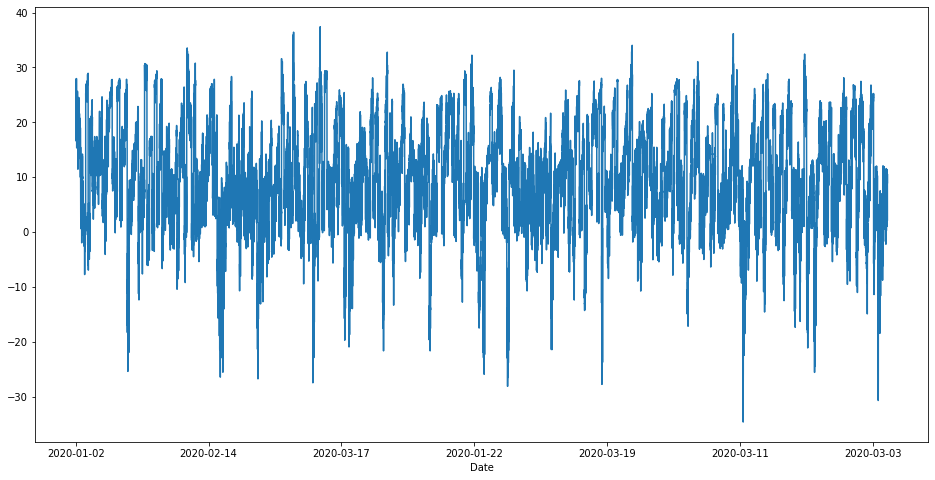

In [11]:
temp = df['temperature_2m_above_ground']
temp.plot(figsize = (16, 8))



<AxesSubplot:xlabel='Date'>

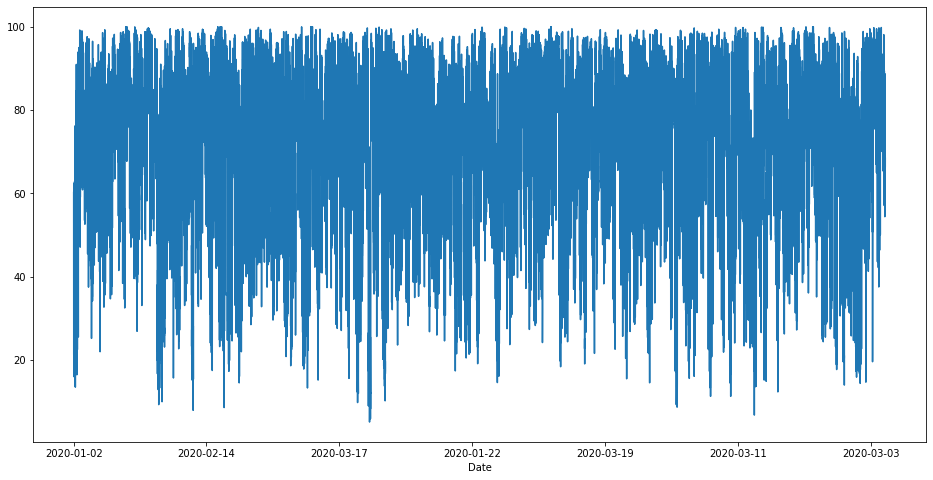

In [12]:
humi = df['relative_humidity_2m_above_ground']
humi.plot(figsize = (16, 8))

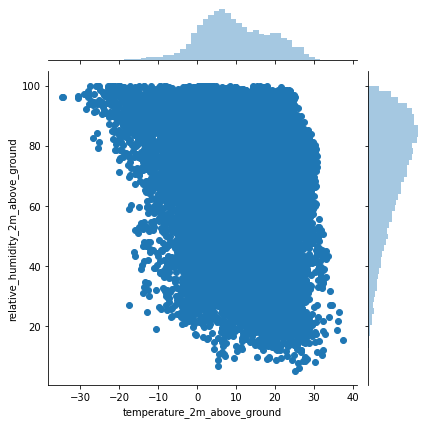

In [11]:
sns.jointplot(temp, humi)

with decreasing humidity, the temperature increases

<AxesSubplot:xlabel='Date'>

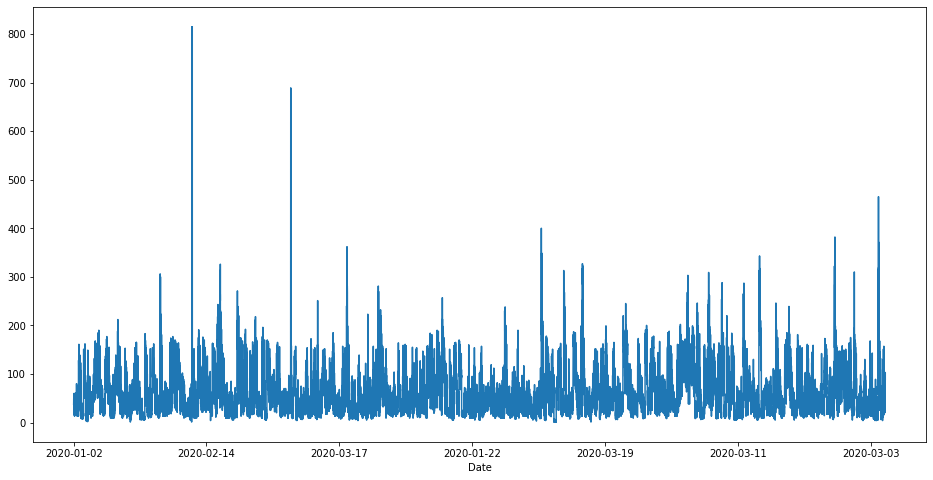

In [13]:
pm25_conc = df['target']
pm25_conc.plot(figsize = (16, 8))

The location with the highest quantity has it sometimes around January

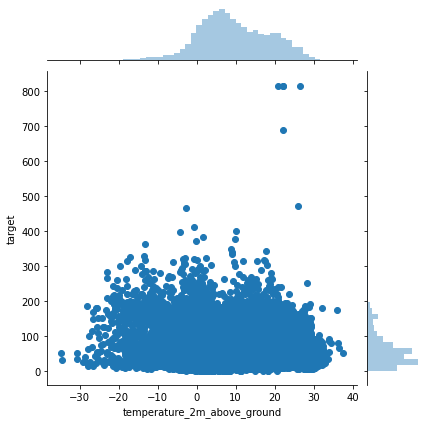

In [13]:
sns.jointplot(temp, pm25_conc)

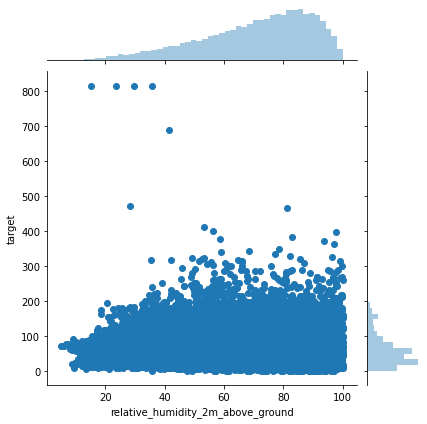

In [14]:
sns.jointplot(humi, pm25_conc)

PM25 increases with increasing Humidity

There are some outliers in the data

The Location with the highest quantity of PM25 turns out to have a low humidity

## Feature Engineering and selection

In [14]:
to_train = ['Date','precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground', 'L3_NO2_NO2_column_number_density', 'L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density', 'L3_HCHO_HCHO_slant_column_number_density', 'L3_CLOUD_cloud_base_pressure', 'L3_CLOUD_cloud_top_pressure', 'L3_AER_AI_absorbing_aerosol_index', 'L3_SO2_SO2_column_number_density_amf', 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air']

In [15]:
df = data[to_train]

df['Date'] = pd.to_datetime(df.Date)
df['day'] = df.Date.dt.dayofweek
df['month'] = df.Date.dt.month

In [16]:
df['wind_speed'] = np.sqrt((np.square(data['u_component_of_wind_10m_above_ground']) + np.square(data['v_component_of_wind_10m_above_ground'])))

In [17]:
df['target'] = data['target']
df = df.drop('Date', 1)

In [18]:
nulls = ['L3_NO2_NO2_column_number_density', 'L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density', 'L3_HCHO_HCHO_slant_column_number_density', 'L3_CLOUD_cloud_base_pressure', 'L3_CLOUD_cloud_top_pressure', 'L3_AER_AI_absorbing_aerosol_index', 'L3_SO2_SO2_column_number_density_amf']

In [19]:
for i in nulls:
    if df[i].isnull:
        df[i].fillna(value = df[i].mean(), inplace=True)

In [20]:
ch4 = list(df['L3_CH4_CH4_column_volume_mixing_ratio_dry_air'][df['L3_CH4_CH4_column_volume_mixing_ratio_dry_air'].isnull()].index)
imp = IterativeImputer(RandomForestRegressor(n_estimators=5), max_iter=5, random_state=1)
to_train_rand = ['L3_CH4_CH4_column_volume_mixing_ratio_dry_air','month','L3_CLOUD_cloud_top_pressure','L3_CLOUD_cloud_base_pressure','L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density', 'L3_HCHO_HCHO_slant_column_number_density']
df[to_train_rand] = pd.DataFrame(imp.fit_transform(df[to_train_rand]), columns=to_train_rand)
df['L3_CH4_CH4_column_volume_mixing_ratio_dry_air'][ch4].head(10)

2        0.000000
3        0.000000
4      753.953476
5      727.028662
6        0.000000
7      383.471317
8        0.000000
17       0.000000
18    1823.585164
19     357.198577
Name: L3_CH4_CH4_column_volume_mixing_ratio_dry_air, dtype: float64

## Model Building

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

reg = reg = ExtraTreesRegressor(n_jobs = -1)
model = reg.fit(X_train_scaled, y_train)
predict  = model.predict(X_test_scaled)
print('Scaled Accuracy is  {}'.format(np.sqrt(mean_squared_error(predict, y_test))))

Scaled Accuracy is  31.05114504823736


## LIGHT BOOST

In [26]:
import lightgbm as lgb
from sklearn.model_selection import KFold

In [36]:
train_data = lgb.Dataset(X_train_scaled, label = y_train)
test_data  = lgb.Dataset(X_test_scaled, label = y_test)


param = {'objective':'regression',
         'boosting': 'gbdt',
         'metric': 'rmse',
         'learning_rate': 0.05,
         'num_iterations': 11500,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.8,
         'bagging_freq': 1,
         'feature_fraction':0.8    
}

clf = lgb.train(params = param, early_stopping_rounds = 300, verbose_eval = 500, train_set = train_data, valid_sets = [test_data])

y_pred = clf.predict(X_test_scaled)

Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 30.9847
[1000]	valid_0's rmse: 30.6029
[1500]	valid_0's rmse: 30.4516
[2000]	valid_0's rmse: 30.4051
Early stopping, best iteration is:
[1981]	valid_0's rmse: 30.3962
